# 머신러닝 기말과제 : Xgboost 기반 뇌졸중 예측 모델 개발
AI응용학과 2293094 배도현


---

> 뇌졸중은 전 세계적으로 높은 사망률과 장애율을 유발하는 주요 질환 중 하나다. 이를 예방하기 위해 조기 진단과 위험 요인 분석이 중요하다. 본 프로젝트는 의료 데이터를 활용하여 머신러닝 기반의 뇌졸중 위험 예측 모델을 개발하고, 사용자 맞춤형 예측 시스템을 구현함으로써 뇌졸중 예방에 기여하는 것을 목표로 한다.

### 프로젝트 요약

이 프로젝트는 뇌졸중 예측을 목표로 하며, 다양한 머신러닝 알고리즘을 활용하여 최적의 성능을 도출하는 데 초점을 맞췄다. 사용된 데이터셋은 뇌졸중과 관련된 다양한 특성을 포함하며, 데이터 전처리와 모델 비교를 통해 정확도와 재현율(AUC 및 Recall) 측면에서 최적의 모델을 선정하였다.\
	사용 데이터: Stroke Prediction Dataset (https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)  
	사용 알고리즘: Extreme Gradient Boosting (XGBoost), Random Forest (RF), Decision Tree (DT), Linear Discriminant Analysis (LDA), Logistic Regression (LR)\
	평가 지표: Accuracy, AUC, Recall, Precision, F1-score 등\
    최적 모델: XGBoost\
	정확도: 94.67% / AUC: 98.86% /  재현율(Recall): 96.70%

이러한 결과를 통해 XGBoost가 높은 재현율과 AUC 점수를 기반으로 뇌졸중 예측에 가장 적합한 모델임을 확인할 수 있었다.

---

### 프로젝트 목차  

1. 개발 환경 구축  
프로젝트 실행에 필요한 라이브러리 설치 및 환경 구성, PyCaret 지원 모델 확인.

2. 데이터 분석  
데이터셋 로드 및 기본 통계와 분포 확인으로 데이터를 분석하는 과정임.

3. 데이터 전처리  
결측치 처리, 범주형 변수 인코딩, 데이터 정규화를 수행함.

4. 모델 선정을 위한 모델 학습  
PyCaret을 활용하여 다양한 분류 모델 학습 및 비교를 진행함.

5. 최종 모델 선정  
성능 평가 결과를 바탕으로 최적의 모델을 선정함.

6. 선정된 모델을 활용하여 뇌졸중 예측  
사용자 입력을 기반으로 예측을 수행하고 결과를 출력함.



---



## 1. 개발 환경 구축
프로젝트 실행을 위해 PyCaret, imblearn, pandas, numpy 등 필요한 라이브러리를 설치하고, 데이터 분석과 머신러닝을 위한 라이브러리를 import한다. 그리고 이번 프로젝트의 핵심인 PyCaret의 models() 함수를 사용해 지원되는 모델 리스트를 확인한다.

---


In [1]:
# 필요한 라이브러리 설치
!pip install pycaret --quiet

In [2]:
# 데이터 처리 관련 라이브러리 import
import pandas as pd
import numpy as np

# 데이터 전처리 관련 라이브러리 import
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# PyCaret import
from pycaret.classification import *

# 데이터 시각화 관련 라이브러리 import
import matplotlib.pyplot as plt
import seaborn as sns


PyCaret는 Python 기반의 자동화 머신러닝 라이브러리로, 데이터 전처리, 모델 학습, 평가, 하이퍼파라미터 튜닝 등의 작업을 간단한 코드로 수행할 수 있다.
이 라이브러리는 코드 양을 줄이고, 머신러닝 워크플로우를 효율적으로 관리할 수 있도록 설계되었다. PyCaret의 주요 기능은 아래와 같다.  
	1. Setup: 데이터 전처리 및 환경 설정  
	2. Model Training: 다양한 알고리즘을 한 번에 비교  
	3. Evaluation: 모델의 성능 평가 및 시각화  
	4. Prediction: 학습된 모델을 사용해 새로운 데이터 예측  
	5. Tuning: 하이퍼파라미터 최적화  
    
    
아래 코드는 PyCaret에서 지원하는 모델을 리스트로 출력한 것이며, 그 중 수업시간에 배운 모델로 후보를 선정하였다.

---

In [3]:
# 예시 데이터로 PyCaret 설정
s = setup(data=pd.DataFrame({'A': [0, 1, 2, 3], 'B': [1, 0, 1, 0], 'target': [0, 1, 0, 1]}), 
          target='target', html=False, verbose=False)  

# 사용 가능한 모델 리스트 출력
available_models = models()
print(available_models)

                                     Name  \
ID                                          
lr                    Logistic Regression   
knn                K Neighbors Classifier   
nb                            Naive Bayes   
dt               Decision Tree Classifier   
svm                   SVM - Linear Kernel   
rbfsvm                SVM - Radial Kernel   
gpc           Gaussian Process Classifier   
mlp                        MLP Classifier   
ridge                    Ridge Classifier   
rf               Random Forest Classifier   
qda       Quadratic Discriminant Analysis   
ada                  Ada Boost Classifier   
gbc          Gradient Boosting Classifier   
lda          Linear Discriminant Analysis   
et                 Extra Trees Classifier   
xgboost         Extreme Gradient Boosting   
lightgbm  Light Gradient Boosting Machine   
dummy                    Dummy Classifier   

                                                  Reference  Turbo  
ID                            

## 2. 데이터 분석 

    데이터 개요
    
	목적: 환자의 건강 상태 데이터를 기반으로 뇌졸중 발생 가능성을 예측
	데이터 크기: 총 5110개의 데이터
	특징(Features):
	1. gender (성별): Male, Female, Other
	2. age (나이): 환자의 나이
	3. hypertension (고혈압 여부): 0 (없음), 1 (있음)
	4. heart_disease (심장병 여부): 0 (없음), 1 (있음)
	5. ever_married (결혼 여부): No, Yes
	6. work_type (직업 유형): Private, Govt_job, Self-employed, children, Never_worked
	7. Residence_type (거주 지역): Rural, Urban
	8. avg_glucose_level (평균 혈당 수치): 환자의 평균 혈당 수치
	9. bmi (체질량 지수): 환자의 BMI (결측값 존재)
	10. smoking_status (흡연 상태): formerly smoked, never smoked, smokes, Unknown
	
    타겟(Label):
	stroke: 뇌졸중 발생 여부
    0: 뇌졸중 발생하지 않음
	1: 뇌졸중 발생
    
	특징 및 라벨:
	특징: 위의 10가지 속성을 기반으로 뇌졸중 발생 가능성을 예측
	타겟(라벨): stroke 열은 이진 분류 문제로, 뇌졸중 발생 여부(0 또는 1)를 나타냄
---

데이터 분석 단계에서는 데이터의 기본적인 분포와 특성을 파악하여 이후 데이터 전처리 및 모델링 과정에서 활용할 수 있는 인사이트를 도출한다. 주요 분석 내용은 다음과 같다:  \
	1.	기본 정보 확인\
	데이터셋의 행(row)과 열(column) 개수를 확인하고, 각 열의 데이터 타입과 결측값 유무를 파악한다.\
	2.	결측값 확인 및 처리\
	결측값이 존재하는 열을 확인하고, 적절한 처리 방법(예: 평균값 대체)을 적용한다.\
	3.	타깃 분포 분석\
	타깃 변수(예: stroke)의 클래스 분포를 시각화하여 데이터 불균형 여부를 확인한다.\
    4.	기술 통계 확인\
	수치형 변수의 최소값, 최대값, 평균, 중간값 등 기술 통계를 확인하여 데이터의 전반적인 분포를 이해한다.\
	5.	범주형 변수 분석\
	범주형 변수의 각 클래스별 빈도수를 확인하고 시각화한다.
    
---

In [4]:
# 파일 경로로 Read
file_path = '/Users/dohyun/Desktop/healthcare-dataset-stroke-data.csv'
df = pd.read_csv(file_path)

In [5]:
# 데이터 기본 정보 확인
print("데이터셋의 기본 정보:")
df.info() 

# 결측값 확인
print("\n각 열의 결측값 개수:")
print(df.isnull().sum())

# 기술 통계 확인
print("\n기술 통계 요약:")
print(df.describe())

데이터셋의 기본 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

각 열의 결측값 개수:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_

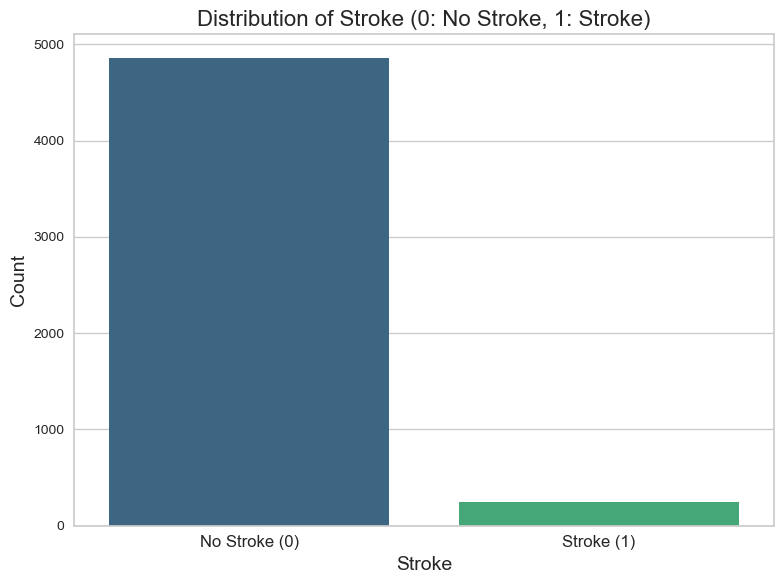

In [6]:
# 뇌졸중 타겟 분포 확인
stroke_counts = df['stroke'].value_counts()

# 분포 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=stroke_counts.index, y=stroke_counts.values, palette='viridis')
plt.title('Distribution of Stroke (0: No Stroke, 1: Stroke)', fontsize=16)
plt.xlabel('Stroke', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No Stroke (0)', 'Stroke (1)'], fontsize=12)
plt.tight_layout()

# 그래프 출력
plt.show()

범주형 변수 목록: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

gender 변수의 클래스별 빈도수:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


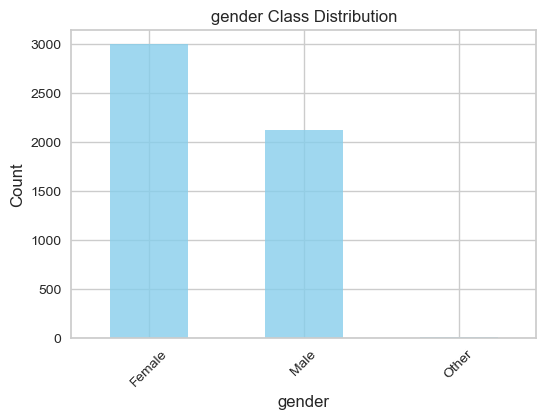


ever_married 변수의 클래스별 빈도수:
Yes    3353
No     1757
Name: ever_married, dtype: int64


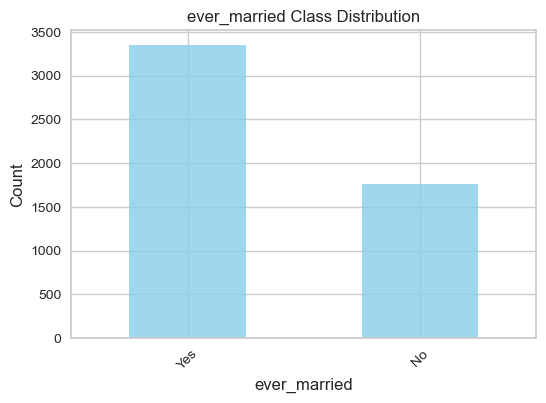


work_type 변수의 클래스별 빈도수:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


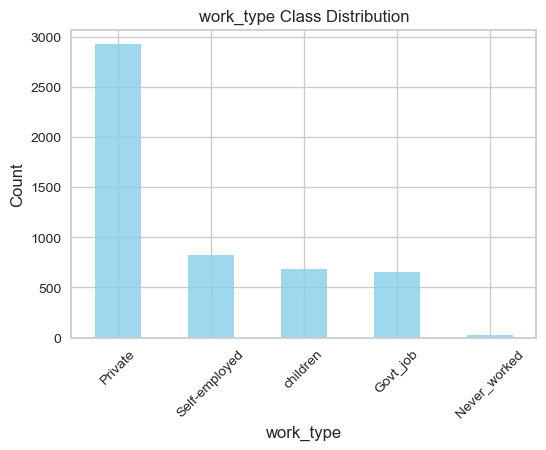


Residence_type 변수의 클래스별 빈도수:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


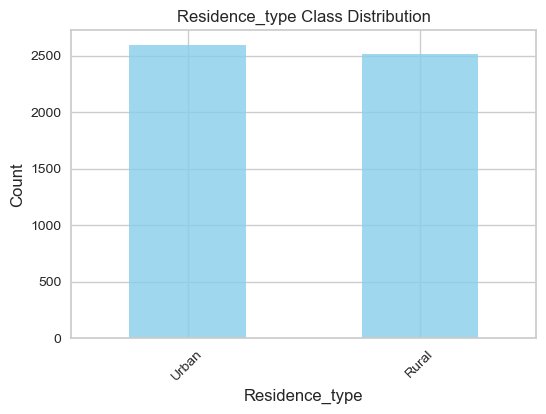


smoking_status 변수의 클래스별 빈도수:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


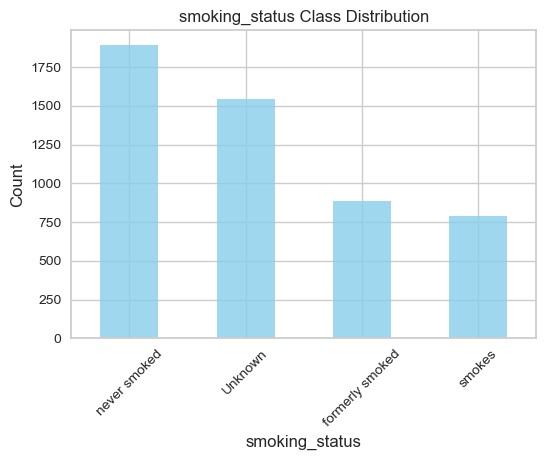

In [7]:
# 범주형 변수 확인
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("범주형 변수 목록:", cat_cols)

# 각 범주형 변수의 클래스별 빈도수 출력 및 시각화
import matplotlib.pyplot as plt

for col in cat_cols:
    print(f"\n{col} 변수의 클래스별 빈도수:")
    print(df[col].value_counts())

    # 시각화
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'{col} Class Distribution')
    plt.xlabel(f'{col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## 3. 데이터 전처리
데이터 전처리는 머신러닝 모델을 훈련시키기 전에 데이터를 정리하고 준비하는 필수 단계다.
데이터셋의 품질을 향상시키고, 모델이 데이터를 효과적으로 학습할 수 있도록 다음과 같은 작업을 포함한다.\
	1.	결측값 처리\
	결측값은 모델 학습을 방해하거나 잘못된 결과를 유발할 수 있으므로 처리해야 한다.\
    2.	불필요한 열 제거\
	예측과 관련이 없는 데이터(예: ID 열)를 제거하여 모델의 성능을 개선한다.\
    3.	범주형 변수 인코딩\
	머신러닝 모델은 숫자 데이터를 요구하므로, Label Encoding를 통해 숫자로 변환하였다.\
    4.	데이터 정규화\
	StandardScaler를 사용하여 평균 0, 분산 1로 정규화.\
    5.	불균형 데이터 처리\
	SMOTE를 사용해 소수 클래스 샘플을 생성.

---

In [8]:
# 데이터 전처리
df.drop('id', axis=1, inplace=True)  # ID 열 제거
df['bmi'] = df['bmi'].astype(float)  # BMI를 float로 변환
df['bmi'].fillna(df['bmi'].mean(), inplace=True)  # 결측값 채우기

# 범주형 변수 인코딩
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
# 특성과 타깃 분리
X = df.drop('stroke', axis=1)  # 'stroke' 열을 제외한 데이터셋을 X에 저장
y = df['stroke']  # 'stroke' 열을 타깃 변수 y에 저장

# 데이터를 훈련 세트와 테스트 세트로 나누기 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SMOTE를 사용하여 클래스 불균형 처리
sm = SMOTE(random_state=42)  # SMOTE 객체 생성
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)  # 훈련 데이터를 오버샘플링하여 클래스 균형 맞추기

# PyCaret에서 사용할 훈련 데이터셋 생성
train_data = pd.DataFrame(X_train_res)  # 오버샘플링된 X 데이터를 DataFrame으로 변환
train_data['stroke'] = y_train_res  # 타깃 변수 'stroke' 추가

## 4. 모델 선정을 위한 모델 학습  

사용 알고리즘\
	1.	Extreme Gradient Boosting (XGBoost):\
	선정 이유:\
	• 대규모 데이터셋과 복잡한 비선형 문제 해결에 강력함.\
	• 병렬 처리를 통해 빠른 학습과 예측 가능.\
	• 과적합 방지를 위한 정규화 및 여러 하이퍼파라미터 지원.\
	• 다른 알고리즘과 비교했을 때 높은 정확도(Accuracy)와 AUC를 보임.\
	2.	Random Forest (RF):\
	선정 이유:\
	• 다양한 데이터 분포에 유연하고 과적합에 강함.\
	• 주요 특징의 중요도를 확인하기 쉬움.\
	3.	Decision Tree (DT):\
	선정 이유:\
	• 간단하고 해석 가능한 모델로, 결과 이해가 쉬움.\
	• 비교를 위해 사용.\
	4.	Logistic Regression (LR):\
	선정 이유:\
	• 기본적인 선형 모델로, 데이터의 기본 패턴을 파악하기 위해 사용.\
	• 다른 복잡한 모델과 비교하기 위한 기준선 역할.\
	5.	Linear Discriminant Analysis (LDA):\
	선정 이유:\
	• 클래스 간 변별력을 최대화하며 선형적으로 구분 가능한 데이터에 적합.

---
매개변수 선택 근거

1.	XGBoost 기본값 사용:\
	•	PyCaret에서 create_model 함수를 사용하여 생성된 XGBoost 모델은 기본 매개변수로 설정했다. 
\
    주요 기본값:\
	•	scale_pos_weight: 클래스 불균형 문제를 해결하기 위한 가중치는 기본값 1로 설정되었다.\
	•	max_depth: 기본값 6으로, 적절한 모델 복잡도를 유지하며 과적합을 방지한다.\
	•	learning_rate: 기본값 0.3으로 설정되어 빠르게 학습을 수렴하도록 설계되었다.\
	•	n_estimators: 기본값 100개의 트리를 사용하여 안정적인 성능을 제공한다.\
	•	XGBoost는 데이터의 패턴을 잘 학습하는 알고리즘으로, 기본값을 사용했음에도 높은 성능을 나타내었다.

2.	다른 모델의 기본값 사용:\
	•	Random Forest: PyCaret의 create_model 함수는 n_estimators=100 및 max_depth=None 등 기본값을 사용하여 트리를 생성했다.\
	•	Logistic Regression 및 LDA: 비교 평가의 목적이므로 별도의 튜닝 없이 기본 매개변수로 실행했다.

In [10]:
# PyCaret 설정
s = setup(data=train_data, target='stroke', session_id=123, normalize=True)

# 지정한 모델 학습 및 비교
models_to_include = ['xgboost', 'rf', 'dt', 'lr', 'lda']
best_model = compare_models(include=models_to_include)

,Description,Value
0,Session id,123
1,Target,stroke
2,Target type,Binary
3,Original data shape,"(7802, 11)"
4,Transformed data shape,"(7802, 11)"
5,Transformed train set shape,"(5461, 11)"
6,Transformed test set shape,"(2341, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9467,0.9886,0.9670,0.9294,0.9478,0.8934,0.8943,0.3390
rf,Random Forest Classifier,0.9452,0.9882,0.9670,0.9267,0.9464,0.8905,0.8914,0.0950
dt,Decision Tree Classifier,0.9083,0.9083,0.9260,0.8947,0.9099,0.8165,0.8173,0.0090
lda,Linear Discriminant Analysis,0.8121,0.8905,0.8440,0.7938,0.8180,0.6242,0.6257,0.0080
lr,Logistic Regression,0.8119,0.8921,0.8349,0.7986,0.8162,0.6239,0.6248,0.0070


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

XGBoost가 다른 알고리즘보다 높은 정확도, AUC 및 Recall을 기록하여 최적의 성능을 보임.\
특히 Recall(0.9670)에서 가장 높은 값을 기록, 이는 모델이 뇌졸중 위험 환자를 놓치지 않는 데 탁월함을 의미.\
다른 모델(Random Forest 등)도 유사한 성능을 보였으나, XGBoost가 가장 안정적이고 일관된 결과를 제공.

결론: XGBoost는 복잡한 데이터 패턴을 처리하며, Recall과 Precision 모두에서 뛰어난 성능을 발휘해 최적의 알고리즘으로 선택됨.

## 5. 최종 모델 선정

xgboost가 모든 측면에서 성능이 우수해서, xgboost를 최종 모델로 선정하였다.

In [11]:
from xgboost import XGBClassifier

# XGBoost 모델 생성
xg = create_model('xgboost')  # PyCaret의 create_model 함수로 XGBoost 모델 생성

# 기본 모델 평가
evaluate_model(xg)  # 생성한 모델을 평가하여 성능을 확인

# 테스트 데이터에 대한 예측
preds = predict_model(xg, data=X_test)  # XGBoost 모델을 사용하여 테스트 데이터에 대한 예측 수행

# 예측 결과 출력
print(preds.head())  # 예측 결과의 상위 5개 출력

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9525,0.9884,0.9562,0.9493,0.9527,0.9049,0.9050
1,0.9451,0.9912,0.9670,0.9263,0.9462,0.8901,0.8910
2,0.9359,0.9844,0.9487,0.9250,0.9367,0.8718,0.8721
3,0.9542,0.9864,0.9707,0.9397,0.9550,0.9084,0.9089
4,0.9487,0.9879,0.9707,0.9298,0.9498,0.8974,0.8983
5,0.9487,0.9917,0.9670,0.9329,0.9496,0.8974,0.8980
6,0.9469,0.9877,0.9744,0.9236,0.9483,0.8938,0.8951
7,0.9432,0.9895,0.9707,0.9201,0.9447,0.8864,0.8878
8,0.9432,0.9904,0.9597,0.9291,0.9441,0.8864,0.8869


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

      gender   age  hypertension  heart_disease  ever_married  work_type  \
4688       1  31.0             0              0             0          3   
4478       1  40.0             0              0             1          3   
3849       0   8.0             0              0             0          4   
4355       0  79.0             1              0             1          3   
3826       0  75.0             0              0             1          0   

      Residence_type  avg_glucose_level        bmi  smoking_status  \
4688               0          64.849998  23.000000               0   
4478               0          65.290001  28.299999               2   
3849               1          74.419998  22.500000               0   
4355               0          76.639999  19.500000               2   
3826               0          94.769997  27.200001               2   

      prediction_label  prediction_score  
4688                 0            0.9999  
4478                 0            0.

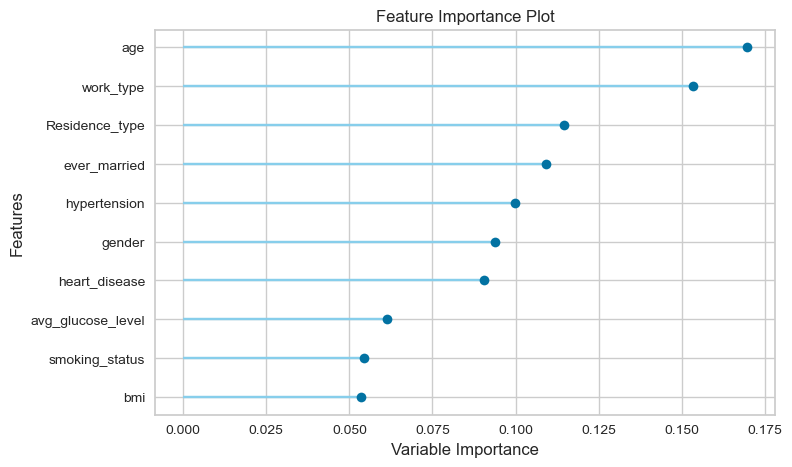

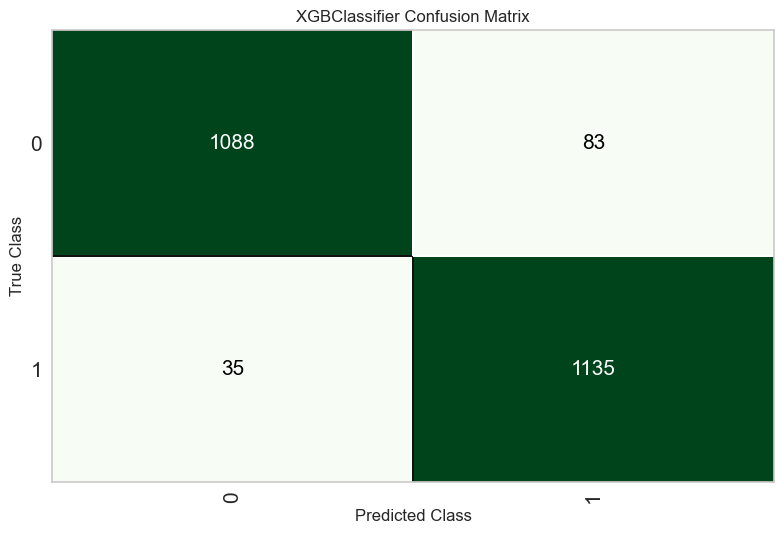

In [12]:
plot_model(xg, plot='feature')  # 특성 중요도 시각화
plot_model(xg, plot='confusion_matrix')  # 혼동 행렬 시각화

## 6. 선정된 모델을 활용하여 뇌졸중 예측 

In [13]:
label_mappings = {
    "gender": {"Male": 1, "Female": 0, "Other": 2},
    "ever_married": {"No": 0, "Yes": 1},
    "work_type": {"children": 0, "Govt_job": 1, "Never_worked": 2, "Private": 3, "Self-employed": 4},
    "Residence_type": {"Rural": 0, "Urban": 1},
    "smoking_status": {"formerly smoked": 0, "never smoked": 1, "smokes": 2, "Unknown": 3},
}

def encode_input(user_input):
    """
    사용자 입력 데이터를 학습 데이터에 맞게 인코딩
    """
    for col, mapping in label_mappings.items():
        user_input[col] = mapping[user_input[col]]
    return user_input

def get_user_input():
    """
    사용자로부터 입력 데이터를 받아 딕셔너리 형태로 반환
    """
    print("다음 정보를 입력하세요:")
    user_input = {
        "gender": input("성별 (Male, Female, Other): "),
        "age": float(input("나이: ")),
        "hypertension": int(input("고혈압 여부 (1: 있음, 0: 없음): ")),
        "heart_disease": int(input("심장병 여부 (1: 있음, 0: 없음): ")),
        "ever_married": input("결혼 여부 (No, Yes): "),
        "work_type": input("직업 유형 (children, Govt_job, Never_worked, Private, Self-employed): "),
        "Residence_type": input("거주 지역 (Rural, Urban): "),
        "avg_glucose_level": float(input("평균 혈당 수치: ")),
        "bmi": float(input("BMI: ")),
        "smoking_status": input("흡연 상태 (formerly smoked, never smoked, smokes, Unknown): "),
    }
    return encode_input(user_input)

# 사용자 입력 받기
user_data = get_user_input()
user_df = pd.DataFrame([user_data])

# 예측 수행
prediction = predict_model(xg, data=user_df)

# 결과 출력
print("\n예측 결과:")
try:
    # 예측 결과 컬럼 확인 및 출력
    custom_threshold = 0.6
    stroke_prediction = "뇌졸중 위험 있음" if prediction["prediction_score"][0] >= custom_threshold else "뇌졸중 위험 없음"
    print(f"뇌졸중 예측 결과: {stroke_prediction}")
    print(f"예측 확률: {prediction['prediction_score'][0]:.2f}")
except Exception as e:
    print(f"\n예측 중 문제가 발생했습니다: {e}")

다음 정보를 입력하세요:


성별 (Male, Female, Other):  Male
나이:  80
고혈압 여부 (1: 있음, 0: 없음):  1
심장병 여부 (1: 있음, 0: 없음):  1
결혼 여부 (No, Yes):  Yes
직업 유형 (children, Govt_job, Never_worked, Private, Self-employed):  Private
거주 지역 (Rural, Urban):  Urban
평균 혈당 수치:  350
BMI:  40
흡연 상태 (formerly smoked, never smoked, smokes, Unknown):  smokes



예측 결과:
뇌졸중 예측 결과: 뇌졸중 위험 있음
예측 확률: 0.75


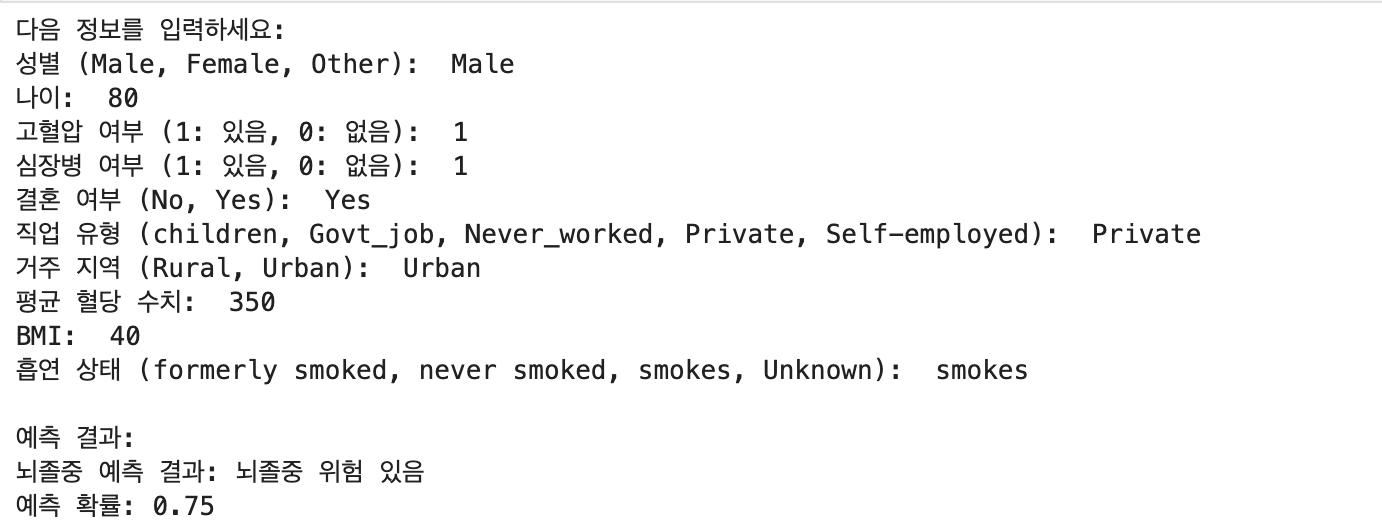

## CHATGPT 사용 캡쳐 - 파이캐럿 추천
https://chatgpt.com/share/6757d843-110c-8007-b90f-83af986fe293

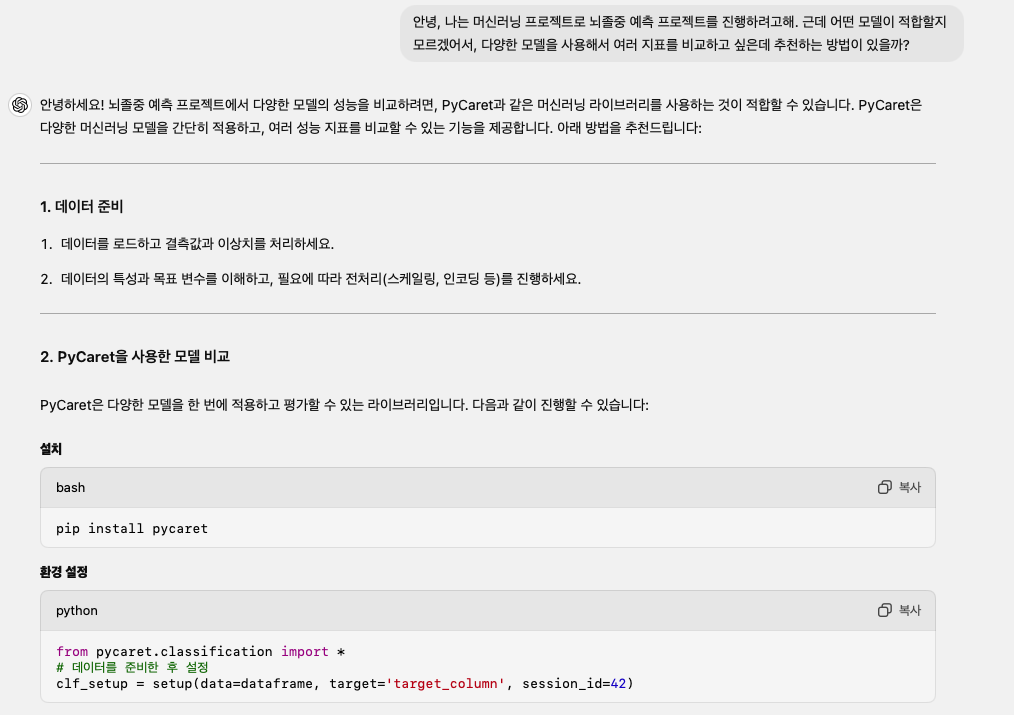